# 现代质量工程学作业

日期：2022年11月  
完成人：北航机械工程及自动化学院 杨威  
学号：SY2207209  

对象：北京35个空气监测站的污染物数据  

### 数据读取（已完成预处理）

In [1]:
#PM2.5随时间变化
import time
import pandas as pd  # 读csv

#绘图
import matplotlib
from matplotlib import pyplot as plt

import numpy as np

# 自己写的qc模块
import qctool as qc

# 完成清洗后的污染数据
data=pd.read_csv("..\\data\\testcsv.csv")
# 北京网格经纬度
content_grid = pd.read_csv(
    '..\\data\\Beijing_grid_weather_station.csv')
# 北京35个空气监测站经纬度
content_search = pd.read_csv(
    '..\\data\\content_search.csv')

In [2]:
id_list = [i for i in range(1,36)]
pollutant_list  =["PM2.5",'PM10','NO2','CO','O3','SO2']
pollutant_maxNormList = [75,150,80,4,100,50]

补齐后的数据刚好是35个监测站各1416条数据  

## 老7QC

### 直方图分析

一个监测站的数据条长度：1416


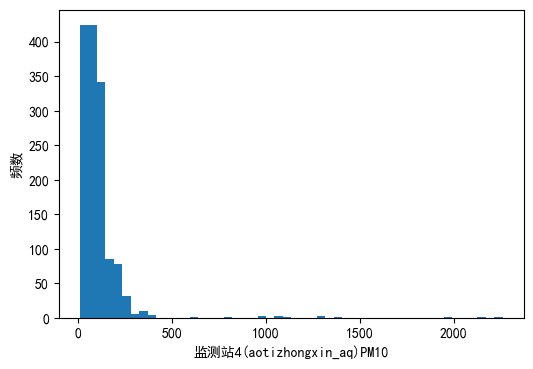

In [4]:
print("一个监测站的数据条长度："+str(len(data[(data['id'] == 1)]['PM2.5'])))

#待定值————监测站序号，污染物序号
n = 4
m = 2

id = id_list[n-1]
pollutant = pollutant_list[m-1]
stationId = content_search.loc[id,'stationId']
description = "监测站"+str(id)+"("+stationId+")"+pollutant

station1_PM25_Array = data[(data['id'] == id)][pollutant].values
qc.Hist(station1_PM25_Array,xlabel=description)

污染物的含量不会为负，可近似看成满足半正态分布  
![半正态分布](https://picd.zhimg.com/80/v2-eb6d9e2b404fbdc8be561108c4166e2a_1440w.webp?source=1940ef5c)

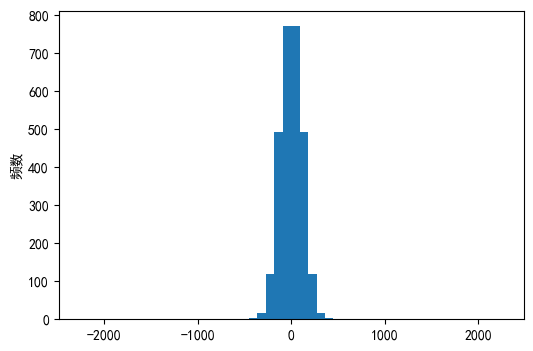

In [5]:

station1_PM25_Array = data[(data['id'] == 4)]['PM10'].values
station1_PM25_Array_cmplt = np.append(station1_PM25_Array,station1_PM25_Array * (-1))

qc.Hist(station1_PM25_Array_cmplt)

均值：0.0
方差：173.89^2


e:\研究生-BUAA\研一上\现代质量工程学\程序及说明文档\Pre\qctool.py:20: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(station1_PM25_Array,kde = True, bins = 20,rug = True,fit=norm,ax=axes)


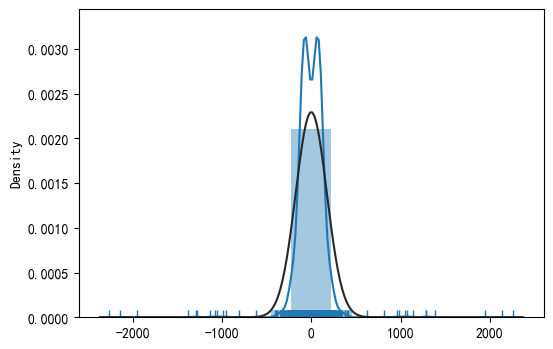

In [6]:
qc.Norm(station1_PM25_Array_cmplt)

对称性的破坏：无论是自然界中还是人类社会中，许多参数就不是对称分布的，这就破坏了正态分布的对称性要求。  
例如城市人群聚集度(到市中心的距离分布)在线性空间和对数空间的统计分布对比  

大气中的污染物浓度分布范围极大，正态分布也不能刻画统计样本的性质，需要使用对数正态分布。

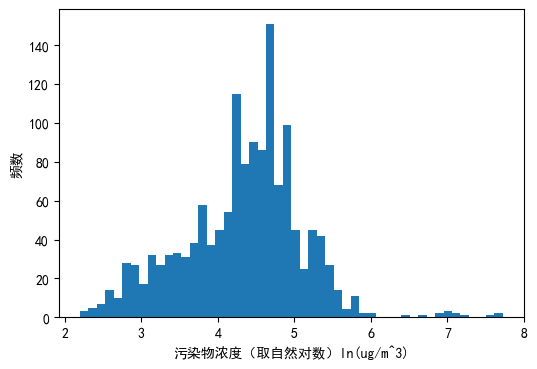

In [7]:


qc.HistLog(station1_PM25_Array,xlabel="污染物浓度（取自然对数）ln(ug/m^3)")

均值：4.32
方差：0.78^2


e:\研究生-BUAA\研一上\现代质量工程学\程序及说明文档\Pre\qctool.py:20: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(station1_PM25_Array,kde = True, bins = 20,rug = True,fit=norm,ax=axes)


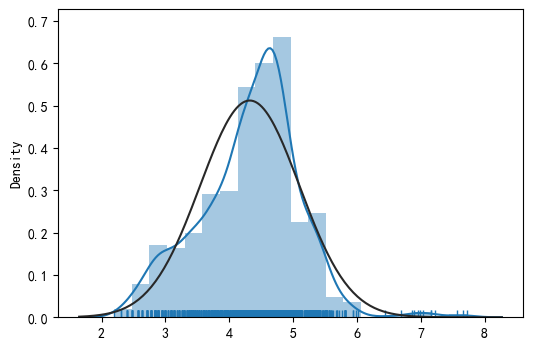

In [8]:
qc.NormLog(station1_PM25_Array)


### 分层法分析

In [44]:
pollutant_list
for pollutant in pollutant_list:
    pollutant_maxNorm = pollutant_maxNormList[pollutant_list.index(pollutant)]
    for id in id_list[:5]:
        value1 = data[(data['id']==id) & (data['standarized_time']%24 < 17) & (data['standarized_time']%24 > 8)][pollutant].values.tolist()
        p1 = sum(i > pollutant_maxNorm for i in value1)
        value2 = data[(data['id']==id) &( (data['standarized_time']%24 > 16) | (data['standarized_time']%24 == 0))][pollutant].values.tolist()
        p2 = sum(i > pollutant_maxNorm for i in value2)
        value3 = data[(data['id']==id) & (data['standarized_time']%24 < 9) & (data['standarized_time']%24 > 0)][pollutant].values.tolist()
        p3 = sum(i > pollutant_maxNorm for i in value3)
        print(pollutant,"监测站",id,p1,p2,p3)

#todo 可以写个自动写进表格的程序，现在手动抄录数据比较慢

PM2.5 监测站 1 177 195 187
PM2.5 监测站 2 173 179 186
PM2.5 监测站 3 175 195 183
PM2.5 监测站 4 165 175 182
PM2.5 监测站 5 172 196 185
PM10 监测站 1 92 93 81
PM10 监测站 2 75 60 54
PM10 监测站 3 100 113 95
PM10 监测站 4 79 68 66
PM10 监测站 5 95 98 83
NO2 监测站 1 44 61 102
NO2 监测站 2 54 52 92
NO2 监测站 3 53 80 123
NO2 监测站 4 46 59 106
NO2 监测站 5 43 75 149
CO 监测站 1 0 2 2
CO 监测站 2 0 0 2
CO 监测站 3 1 0 1
CO 监测站 4 0 0 1
CO 监测站 5 1 0 1
O3 监测站 1 19 48 1
O3 监测站 2 17 52 0
O3 监测站 3 29 62 0
O3 监测站 4 17 40 0
O3 监测站 5 15 49 1


### 鱼骨图

头脑风暴，因素分析

想法：看看有没有比较好绘制流程图的开源库

### 柏拉图（包含检查表）


柏拉图主要是分析一件不好的事情由哪些因素导致，现在把每一天的天气指标标准化，然后选出最大的当主要污染物




C:\Users\13248\AppData\Local\Temp\ipykernel_22472\3042090350.py:47: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  value1 = data[data['id']==id][data['standarized_time'] == i+1][pollutant].values[0]


More than 80% of the node values are indexed as： NO2
More than 80% of the node values index position is： 2
The key factors are：
PM2.5    653
O3       434
NO2      184
dtype: int32
The factors are：
PM2.5    653
O3       434
NO2      184
PM10     141
SO2        3
CO         1
dtype: int32
The cumulative factors are：
PM2.5     653
O3       1087
NO2      1271
PM10     1412
SO2      1415
CO       1416
dtype: int32
The percentage of factors are：
PM2.5    0.461158
O3       0.306497
NO2      0.129944
PM10     0.099576
SO2      0.002119
CO       0.000706
dtype: float64
The cumulative percentage of factors are：
PM2.5    0.461158
O3       0.767655
NO2      0.897599
PM10     0.997175
SO2      0.999294
CO       1.000000
dtype: float64


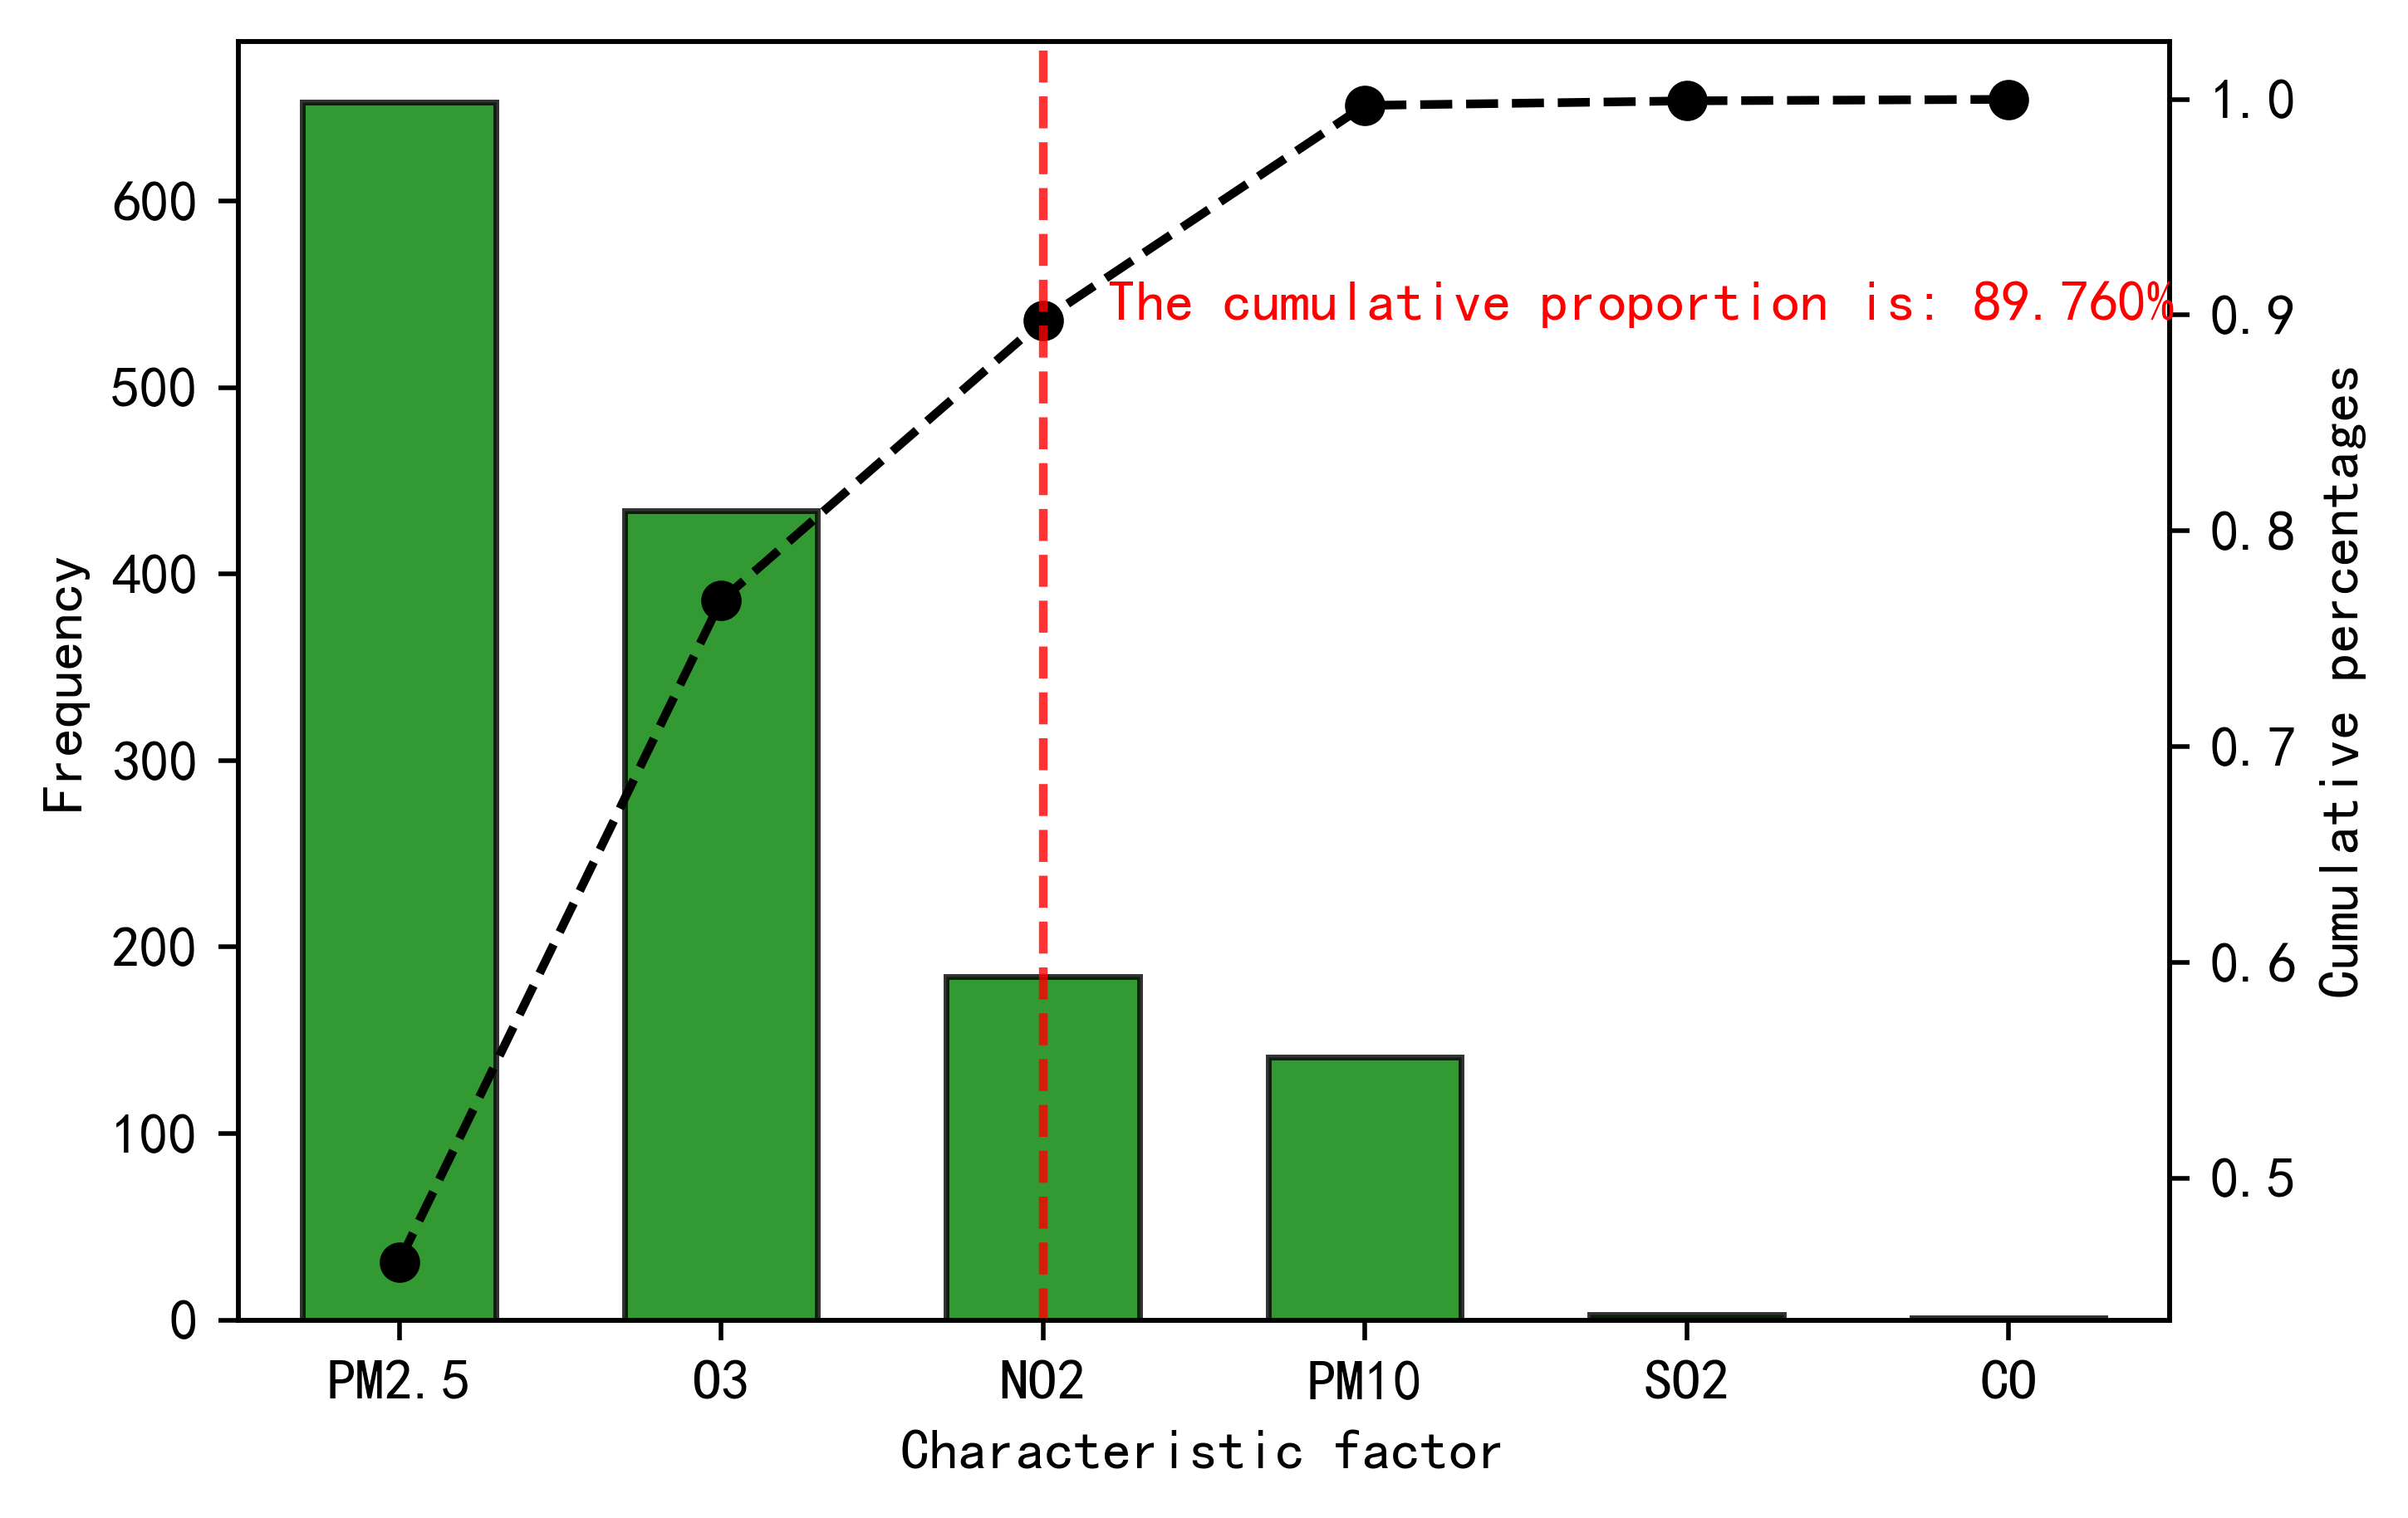

In [19]:
#数据准备，需要的数据：因素数量及因素名称，整合为一个Series

# 下面一段相当于是在做检查表，并使用检查表统计数据，最后，数据用于生成柏拉图
mainFactor = [0,0,0,0,0,0] #分别对应六个污染物
id = 1
for i in range(0,1416):
    standardized_pollutant_list = []
    for pollutant in pollutant_list:
        index = pollutant_list.index(pollutant)
        pollutant_maxNorm = pollutant_maxNormList[index]
        # print(id,i+1)

        value1 = data[data['id']==id][data['standarized_time'] == i+1][pollutant].values[0]

        standardized_pollutant_list.append(value1/pollutant_maxNorm)
    max1 = max(standardized_pollutant_list)
    maxid = standardized_pollutant_list.index(max1)
    mainFactor[maxid] += 1


dataPereto = pd.Series(np.array(mainFactor),index = pollutant_list)
qc.Pareto_analysis(dataPereto)


### 散布图

找出不同的污染物之间的关系，绘制其散点图

 
-0.005886 x + 50.84
基本不相关
相关系数R： 0.0006859464161537154


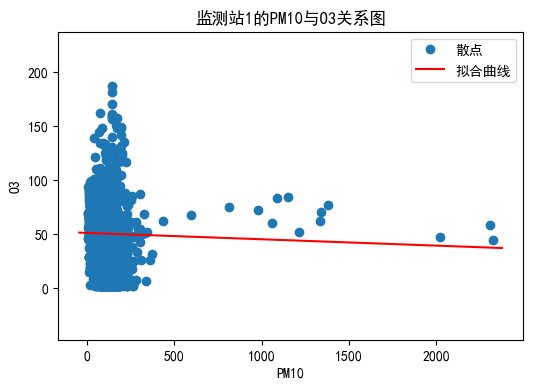

In [9]:
id = 1
pollutantA=pollutant_list[1]
pollutantB=pollutant_list[4]
qc.scatter(data[data['id'] == id][pollutantA].values,data[data['id'] == id][pollutantB].values,xlabel=pollutantA,ylabel=pollutantB,title = '监测站'+str(id)+'的'+pollutantA+'与'+pollutantB+'关系图')

### 控制图

污染数据实时显示

In [35]:

id = 1
pollutant = pollutant_list[0]
minTime=0
maxTime=30
minTime_start=0
maxTime_start=30
x_start = data[data['id'] == id][data['standarized_time'] < maxTime_start][data['standarized_time'] > minTime_start][pollutant]
x = data[data['id'] == id][data['standarized_time'] < maxTime][data['standarized_time'] > minTime][pollutant]
qc.ControlFig(id,pollutant,x,x_start,minTime,maxTime,minTime,maxTime)

AttributeError: module 'qctool' has no attribute 'ControlFig'

至此，老七种QC工具已经全部使用完毕，下面开始新七种QC工具

## 新7QC

### 关联图
关联图是原因-结果、目的-手段等，具有缠绕复杂关系的问题，并将所有的要因全部列出，用自由发言的方式表现出简明的要因，将这些因果关系以理论的原理用箭头连接。并将它们分门别类，使用关键性的动作或结果成为有效的解决办法的中心。


In [ ]:
# 类似于鱼骨图，在ppt里就可以画
# todo 看看python能不能画

### 系统图

系统图是以问题为著眼点作分支式的思考，用以得到问题的解决方案，并明确改善对象内容的一种方法。



In [36]:
# 有点像思维导图，也类似关联图

### 亲和图

亲合图是使用改善小组（项目）成员针对浑沌状态中不清楚的问题，创造性的产生出大量的意见/论点，然后组织和总结出它们的自然类别或亲和性作归纳，以便理解问题的本质以及突破问题的解决办法。

In [ ]:
# 感觉也类似如关联图，这些方法感觉也就是组合一下，归个类

### 矩阵图

选择具有相互关系的不同事项  
选择适当的矩阵图形式  
决定行与列的事项要素是什么  
选择和表示出行与列的关系符号并解释  
在各行与各列的交汇点给予适当的评价  



In [ ]:
# 行和列给出来表头，然后表里画圈圈，用不同符号表示其关联性

### 矩阵数据分析法

目的：  
要对大量的数据与变量进行分析，以求得能够掌握全体的较好的结论，在品质管理上，一般使用在计划和执行的阶段中对大量的数据进行分析时使用。  

作用：  
牵涉到复杂的因素之工程解析  
从多个的资料中解析不良要因  
自市场调查的资料中，要把握顾客所要求的品质  
外观检查时的系统化分类(例：异物的种类与来源)  
复杂的品质评价           
正态分布等数据分析  
新产品开发的规划  


### 矢线图（箭条图）

是以图解法表明完成计划的总体时间，必要连续的和可以同时进行的工作，以及需要检查的关键性工作。这样便能找到最有效的完成计划的途径及符合实际需要的计划表。

实线的箭号：表示计划实行上必要的作业。  
圈记号：称为结合点，定位在作业的起始点和终止点上，表示作业与作业的接点。  
虚线的箭号：是什么都不做的假想作业，亦称为虚拟（DUMMY）作业，在实线无法表示作业的相互关系时使用，表示作业顺序关系。  
圈内数据：称为结合点的称号，通过起点与终点的对号，就可以表示出一个个作业或虚拟作业  


### PDPC法

过程决策程序图法，即所谓的PDPC法，是在制定计划阶段或进行系统设计时，事先预测可能发生的障碍（不理想事态或结果），从而设计出一系列对策措施以最大的可能引向最终目标（达到理想结果）。该法可用于防止重大事故的发生，因此也称之为重大事故预测图法。   


由于一些突发性的原因，可能会导致工作出现障碍和停顿，对此需要用过程决策程序图法进行解决，俗称“多做几手准备”。


In [ ]:
# 也就是做预案